In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Conv2DTranspose,concatenate,MaxPooling2D,Dropout
from tensorflow.keras.models import Model
import shutil
IMG_WIDTH=256
IMG_HEIGHT=256
IMG_CHANNELS=3


In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
! unzip /content/drive/MyDrive/DeepGlobe_dataset.zip


Archive:  /content/drive/MyDrive/DeepGlobe_dataset.zip
  inflating: class_dict.csv          
  inflating: metadata.csv            
  inflating: test/100877_sat.jpg     
  inflating: test/103215_sat.jpg     
  inflating: test/103742_sat.jpg     
  inflating: test/110224_sat.jpg     
  inflating: test/112946_sat.jpg     
  inflating: test/114542_sat.jpg     
  inflating: test/115800_sat.jpg     
  inflating: test/118757_sat.jpg     
  inflating: test/119896_sat.jpg     
  inflating: test/120939_sat.jpg     
  inflating: test/121151_sat.jpg     
  inflating: test/123976_sat.jpg     
  inflating: test/125014_sat.jpg     
  inflating: test/133160_sat.jpg     
  inflating: test/134874_sat.jpg     
  inflating: test/14397_sat.jpg      
  inflating: test/1499_sat.jpg       
  inflating: test/157550_sat.jpg     
  inflating: test/159696_sat.jpg     
  inflating: test/162964_sat.jpg     
  inflating: test/168870_sat.jpg     
  inflating: test/169788_sat.jpg     
  inflating: test/172318_sat.jpg 

In [4]:
os.mkdir('/content/masks')

In [5]:
old_dir = '/content/train/'
new_dir = '/content/masks/'
images = os.listdir('/content/train')
for img in images:
  if img.split('_')[-1] == 'mask.png':
     shutil.move(old_dir+img, new_dir+img)

In [6]:
import numpy as np 

Original=os.listdir('/content/train')
Masks=os.listdir('/content/masks')
Original = Original
Masks = Masks
print(len(Original))
print(len(Masks))

X=np.zeros((len(Original),IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS), dtype=np.float32)
y=np.zeros((len(Masks),IMG_HEIGHT,IMG_WIDTH,7), dtype=np.int32)

803
803


In [7]:
print(X.shape)
print(y.shape)

(803, 256, 256, 3)
(803, 256, 256, 7)


In [8]:
import cv2
import numpy as np 
for file in Original:
    n=Original.index(file)
    path1=os.path.join('/content/train',file)
    print(path1)
    img=cv2.imread(path1)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(256,256))
    try:
        X[n]=img/255
        file2=Masks[n]
        path2=os.path.join('/content/masks',file2)
        mask=cv2.imread(path2,cv2.IMREAD_GRAYSCALE)
        mask=cv2.resize(mask,(256,256))
        mask = tf.one_hot(mask, 7, dtype=tf.int32)
        y[n] = mask
    except Exception as e:
        print(e)
        print(path1)

/content/train/623857_sat.jpg
/content/train/669156_sat.jpg
/content/train/673927_sat.jpg
/content/train/345134_sat.jpg
/content/train/803958_sat.jpg
/content/train/654770_sat.jpg
/content/train/27460_sat.jpg
/content/train/120245_sat.jpg
/content/train/19627_sat.jpg
/content/train/702918_sat.jpg
/content/train/131720_sat.jpg
/content/train/496948_sat.jpg
/content/train/987427_sat.jpg
/content/train/435277_sat.jpg
/content/train/591815_sat.jpg
/content/train/434210_sat.jpg
/content/train/491696_sat.jpg
/content/train/330838_sat.jpg
/content/train/726265_sat.jpg
/content/train/911457_sat.jpg
/content/train/736933_sat.jpg
/content/train/941237_sat.jpg
/content/train/418261_sat.jpg
/content/train/358591_sat.jpg
/content/train/207663_sat.jpg
/content/train/95683_sat.jpg
/content/train/495876_sat.jpg
/content/train/575902_sat.jpg
/content/train/617844_sat.jpg
/content/train/762937_sat.jpg
/content/train/276912_sat.jpg
/content/train/561117_sat.jpg
/content/train/347676_sat.jpg
/content/trai

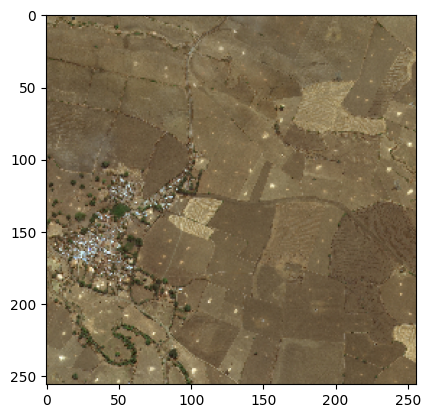

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X[1])

In [10]:
images = X

print(images.shape)

(803, 256, 256, 3)


In [11]:
masks=y

In [12]:
masks.shape

(803, 256, 256, 7)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(images,masks,test_size=0.2,random_state=42)

In [14]:

'''
from keras.preprocessing.image import ImageDataGenerator
seed=24
img_data_gen_args=dict(rotation_range=90,
                       shear_range=0.3,
                       zoom_range=0.2,
                       horizontal_flip=True,
                       vertical_flip=True,
                       fill_mode='nearest')

mask_data_gen_args=dict(rotation_range=90,
                       shear_range=0.3,
                       zoom_range=0.2,
                       horizontal_flip=True,
                       vertical_flip=True,
                       fill_mode='nearest',
                       )
  '''


"\nfrom keras.preprocessing.image import ImageDataGenerator\nseed=24\nimg_data_gen_args=dict(rotation_range=90,\n                       shear_range=0.3,\n                       zoom_range=0.2,\n                       horizontal_flip=True,\n                       vertical_flip=True,\n                       fill_mode='nearest')\n\nmask_data_gen_args=dict(rotation_range=90,\n                       shear_range=0.3,\n                       zoom_range=0.2,\n                       horizontal_flip=True,\n                       vertical_flip=True,\n                       fill_mode='nearest',\n                       )\n  "

In [15]:
batch_size=16

In [16]:
'''
image_data_generator=ImageDataGenerator(**img_data_gen_args)
image_generator=image_data_generator.flow(X_train,
                                          batch_size=batch_size,
                                          seed=seed)
valid_img_genrator=image_data_generator.flow(X_test,
                                             batch_size=batch_size,
                                             seed=seed)
mask_data_generator=ImageDataGenerator(**mask_data_gen_args)
mask_generator=mask_data_generator.flow(y_train,
                                        batch_size=batch_size,
                                        seed=seed)
valid_mask_generator=mask_data_generator.flow(y_test,
                                              batch_size=batch_size,
                                              seed=seed)
'''


'\nimage_data_generator=ImageDataGenerator(**img_data_gen_args)\nimage_generator=image_data_generator.flow(X_train,\n                                          batch_size=batch_size,\n                                          seed=seed)\nvalid_img_genrator=image_data_generator.flow(X_test,\n                                             batch_size=batch_size,\n                                             seed=seed)\nmask_data_generator=ImageDataGenerator(**mask_data_gen_args)\nmask_generator=mask_data_generator.flow(y_train,\n                                        batch_size=batch_size,\n                                        seed=seed)\nvalid_mask_generator=mask_data_generator.flow(y_test,\n                                              batch_size=batch_size,\n                                              seed=seed)\n'

In [17]:
'''
def my_image_mask_gen(image_generator,mask_generator):
  train_generator=zip(image_generator,mask_generator)
  for (img,mask) in train_generator:
    yield (img,mask)

my_generator=my_image_mask_gen(image_generator,mask_generator)
valid_generator=my_image_mask_gen(valid_img_genrator,valid_mask_generator)
'''

'\ndef my_image_mask_gen(image_generator,mask_generator):\n  train_generator=zip(image_generator,mask_generator)\n  for (img,mask) in train_generator:\n    yield (img,mask)\n\nmy_generator=my_image_mask_gen(image_generator,mask_generator)\nvalid_generator=my_image_mask_gen(valid_img_genrator,valid_mask_generator)\n'

In [18]:
inputs=tf.keras.layers.Input((256,256,3))


s = inputs

c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = Dropout(0.2)(c1)  # Original 0.1
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = MaxPooling2D((2, 2))(c1)


c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = Dropout(0.2)(c2)  # Original 0.1
c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = MaxPooling2D((2, 2))(c2)

c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = Dropout(0.2)(c3)
c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = MaxPooling2D((2, 2))(c3)

c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = Dropout(0.2)(c4)
c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     

c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = Dropout(0.3)(c5)
c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = Dropout(0.2)(c6)
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

#Expansive path 

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = Dropout(0.2)(c7)
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = Dropout(0.2)(c8)  # Original 0.1
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = Dropout(0.2)(c9)  # Original 0.1
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
  
     
  
 
outputs = Conv2D(7,(1, 1),activation='softmax')(c9)
 
model = Model(inputs=[inputs], outputs=[outputs])

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping #importing the necessary modules for callbacks
import keras.backend as K

#batch_size=16
#metrics = [sm.metrics.IOUScore(threshold=0.5)]
#input_shape = (256,256,3)
lr = 1e-5

#train_steps = len(X_train)//batch_size
#val_steps = len(X_test)//batch_size

def iou_loss(y_true, y_pred):
      y_true = tf.reshape(y_true, [-1])
      y_pred = tf.reshape(y_pred, [-1])
      intersection = tf.reduce_sum(tf.cast(y_true, tf.float32) * tf.cast(y_pred, tf.float32))
      score = (intersection + 1.) / (tf.reduce_sum(tf.cast(y_true, tf.float32)) + 
      tf.reduce_sum(tf.cast(y_pred, tf.float32)) - intersection + 1.)
      return 1 - score

def mean_iou(y_true, y_pred):
      y_pred = tf.round(tf.cast(y_pred, tf.int32))
      intersect = tf.reduce_sum(tf.cast(y_true, tf.float32) * tf.cast(y_pred, tf.float32), axis=[1])
      union = tf.reduce_sum(tf.cast(y_true, tf.float32),axis=[1]) + tf.reduce_sum(tf.cast(y_pred, tf.float32),axis=[1])
      smooth = tf.ones(tf.shape(intersect))
      return tf.reduce_mean((intersect + smooth) / (union - intersect + smooth))

'''
def dice_coef(y_true, y_pred, smooth=100):        
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    dice = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return dice

def dice_coef_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)
'''

model.compile(optimizer = tf.keras.optimizers.Adam(lr),
              loss=iou_loss, metrics=[mean_iou],
              )


In [20]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

In [21]:
len(X_test)

161

In [22]:
import keras.backend as K
callbacks = [
        tf.keras.callbacks.ModelCheckpoint(filepath=f'models/LandCoverModel_UNET.h5', monitor='val_mean_iou', verbose=1, mode='max', save_best_only=True), # Create a callback that saves the model periodically as training moves along the number of epochs.
             
        tf.keras.callbacks.ReduceLROnPlateau(monitor="val_mean_iou", mode='max', patience=4, factor=0.1, verbose=1, min_lr=1e-6), #This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.
                         
             
        tf.keras.callbacks.EarlyStopping(monitor="val_mean_iou", patience=5, verbose=1, mode='max'),  #Stop training when a monitored metric has stopped improving.
]

#spe=len(image_generator)//batch_size,
#vs=len(mask_generator)//batch_size,

history=model.fit(X_train, y_train,validation_data = (X_test,y_test),
                  epochs=20,
                  callbacks=callbacks)

Epoch 1/20
21/21 [==============================] - ETA: 0s - loss: 1.0000 - mean_iou: 0.9989 
Epoch 1: val_mean_iou improved from -inf to 0.99952, saving model to models/LandCoverModel_UNET.h5
21/21 [==============================] - 682s 32s/step - loss: 1.0000 - mean_iou: 0.9989 - val_loss: 0.9999 - val_mean_iou: 0.9995 - lr: 1.0000e-05
Epoch 2/20
21/21 [==============================] - ETA: 0s - loss: 1.0000 - mean_iou: 0.9994 
Epoch 2: val_mean_iou did not improve from 0.99952
21/21 [==============================] - 620s 29s/step - loss: 1.0000 - mean_iou: 0.9994 - val_loss: 0.9999 - val_mean_iou: 0.9995 - lr: 1.0000e-05
Epoch 3/20
21/21 [==============================] - ETA: 0s - loss: 0.9999 - mean_iou: 0.9994 
Epoch 3: val_mean_iou did not improve from 0.99952
21/21 [==============================] - 633s 30s/step - loss: 0.9999 - mean_iou: 0.9994 - val_loss: 0.9999 - val_mean_iou: 0.9995 - lr: 1.0000e-05
Epoch 4/20
21/21 [==============================] - ETA: 0s - loss: 0.

In [23]:
def predict_image(img_path, mask_path, model):
    H = 256
    W = 256
    num_classes = 7

    img = cv2.imread(img_path)
    img = img[:256, :256, :]
    img = img / 255.0
    img = img.astype(np.float32)

    ## Read mask
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = mask[:256, :256]
    
    ## Prediction
    pred_mask = model.predict(np.expand_dims(img, axis=0))
    pred_mask = np.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[0]
    
    
    # calculating IOU score
    inter = np.logical_and(mask, pred_mask)
    union = np.logical_or(mask, pred_mask)

    iou = inter.sum() / union.sum()

    return img, mask, pred_mask, iou


1/1 [==============================] - 0s 483ms/step


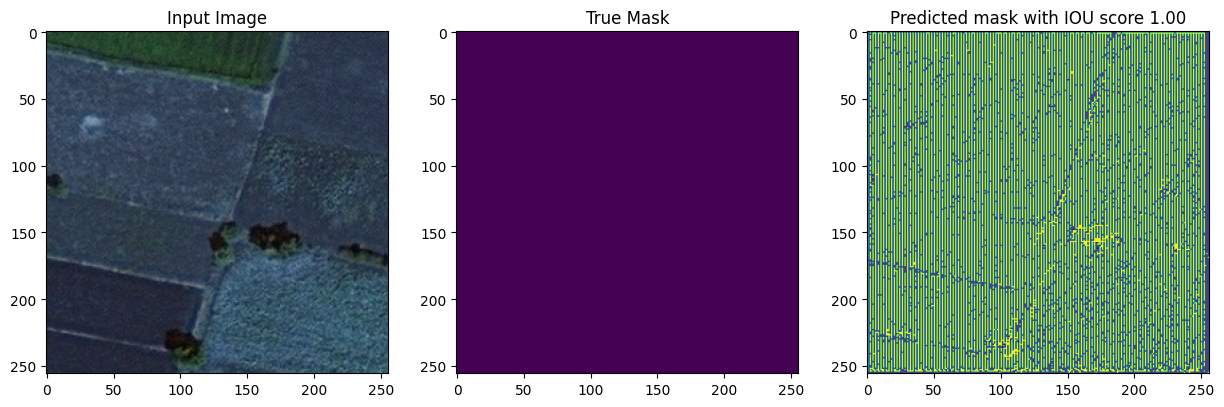

In [32]:
img_path = '/content/train/277644_sat.jpg'
mask_path = '/content/masks/277644_mask.png'

img, mask, pred_mask, iou = predict_image(img_path, mask_path, model)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15, 10))

ax1.set_title("Input Image")
ax1.imshow(img)

ax2.set_title("True Mask")
ax2.imshow(mask)

ax3.set_title("Predicted mask with IOU score %.2f"%(iou))
ax3.imshow(pred_mask)

plt.show()

In [26]:
history

1/1 [==============================] - 0s 438ms/step


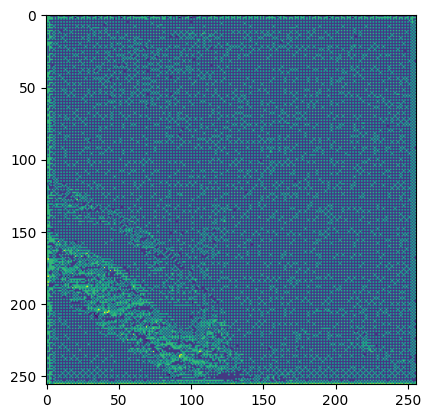

In [11]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2

mask_path = '/content/masks/238322_mask.png'
img_path = '/content/train/238322_sat.jpg'
lr=1e-5

image = cv2.imread(img_path)
image = image[:256, :256, :]
image = image/ 255.0
image = image.astype(np.float32)

def iou_loss(y_true, y_pred):
      y_true = tf.reshape(y_true, [-1])
      y_pred = tf.reshape(y_pred, [-1])
      intersection = tf.reduce_sum(tf.cast(y_true, tf.float32) * tf.cast(y_pred, tf.float32))
      score = (intersection + 1.) / (tf.reduce_sum(tf.cast(y_true, tf.float32)) + 
      tf.reduce_sum(tf.cast(y_pred, tf.float32)) - intersection + 1.)
      return 1 - score

def mean_iou(y_true, y_pred):
      y_pred = tf.round(tf.cast(y_pred, tf.int32))
      intersect = tf.reduce_sum(tf.cast(y_true, tf.float32) * tf.cast(y_pred, tf.float32), axis=[1])
      union = tf.reduce_sum(tf.cast(y_true, tf.float32),axis=[1]) + tf.reduce_sum(tf.cast(y_pred, tf.float32),axis=[1])
      smooth = tf.ones(tf.shape(intersect))
      return tf.reduce_mean((intersect + smooth) / (union - intersect + smooth))

# Load the segmentation model
model = load_model('/content/drive/MyDrive/BE Project 2023/Models/LandCoverModel_UNET[Scratch].h5', compile=False)
model.compile(optimizer = tf.keras.optimizers.Adam(lr),
              loss=iou_loss, metrics=[mean_iou],
              )

pred_mask = model.predict(np.expand_dims(image, axis=0))
pred_mask = np.argmax(pred_mask, axis=-1)
pred_mask = pred_mask[0]
plt.imshow(pred_mask)

In [ ]:
'''
!pip install -q gradio
!pip install PyDrive

!pip install -U -q segmentation-models
!pip install -q tensorflow==2.2.1
!pip install -q keras==2.5


from tensorflow import keras


import io
from google.colab import drive
import numpy as np
import cv2
import gradio as gr
from tensorflow.keras.models import load_model


# Authenticate and create the PyDrive client
drive.mount('/content/drive')

# Load the segmentation model
model = load_model('/content/drive/MyDrive/DeepGlobe Unet[Scratch].h5')

# Define a function for segmenting land
def segment_land(image):

    #image = cv2.imread(img_path)
    image = image[:288, :288, :]
    image = image / 255.0
    image = image.astype(np.float32)

    # Perform segmentation
    #mask = model.predict(image)[0]
    #mask = cv2.resize(mask, (image.shape[2], image.shape[1]))
    #mask = np.where(mask > 0.5, 1, 0).astype(np.uint8)

    ## Prediction
    pred_mask = model.predict(np.expand_dims(image, axis=0))
    pred_mask = np.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[0]

    # Apply the mask on the original image
    #result = cv2.bitwise_and(image[0], image[0], mask=mask)

    return pred_mask


!pip install segmentation_models

from keras.models import load_model
from segmentation_models import PSPNet
from segmentation_models.metrics import iou_score

# Load the segmentation model
model = load_model('/content/drive/MyDrive/PSPNet-new.h5', custom_objects={'PSPNet': PSPNet, 'iou_score': iou_score})

# Define a function for segmenting land
def segment_land(image):
    # Perform land segmentation using the loaded model
    result = model.predict(image)
    # Return the segmented land image
    return result

    '''

# Define the Gradio interface
inputs = gr.inputs.Image()
outputs = gr.outputs.Image(type='pil')
interface = gr.Interface(fn=segment_land, inputs=inputs, outputs=outputs, title='Land Segmentation', 
                         description='Segment land from an image using a deep learning model.')
interface.launch(share=True, debug=True)
'''